In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('/content/Amazon Sale Report.xlsx')

In [3]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

In [5]:
data.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [6]:
col_to_drop=['New','PendingS']
data.drop(col_to_drop,axis=1,inplace=True)

In [7]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [8]:
df=data[data['currency'].isnull()]

In [9]:
df['Status'].value_counts()

,count
Status,
Cancelled,7571
Shipped,208
Shipped - Delivered to Buyer,8
Shipping,8
Shipped - Returned to Seller,3
Pending,2


In [10]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [11]:
df[df['ship-state'].isnull()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
73912,73911,405-3420451-5230744,2022-05-11,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,M,Cancelled,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
106499,106498,402-8673941-7883531,2022-06-16,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XL,Cancelled,0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [12]:
data=data.drop([73912,106499	])

In [13]:
data[data['Fulfilment']=='Amazon']

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN


In [14]:
data['fulfilled-by'].value_counts()

,count
fulfilled-by,
Easy Ship,39263



**here we can observe that , if the Fulfilment is Amazon then fullfilled_by is NONE , here likewise there are "89713"(most of the rows are none) rows are NONE, Remaining  all are Easy Ship , so this column is not needed for further analysis , so by
this we can remove or drop this column. ** **bold text**

In [15]:
data.drop('fulfilled-by', axis=1,inplace=True)

In [16]:
df[df['fulfilled-by'].isnull()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
65,65,171-4137548-0481151,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XXL,Cancelled,0,NaN,NaN,Dahod,Gujarat,389151.0,IN,False,NaN
84,84,403-9950518-0349133,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500072.0,IN,False,NaN
95,95,405-9112089-3379536,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,L,Cancelled,0,NaN,NaN,PUNE,MAHARASHTRA,411046.0,IN,False,NaN
101,101,402-7841951-1872363,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,S,Cancelled,0,NaN,NaN,NEW DELHI,DELHI,110036.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,128903,406-3923120-4345139,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN
128908,128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN
128909,128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN
128959,128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,0,NaN,NaN,Bengaluru,KARNATAKA,560037.0,IN,False,NaN


In [17]:
df['Category'].value_counts()

,count
Category,
T-shirt,3243
Shirt,3164
Blazzer,797
Trousers,456
Perfume,66
Wallet,45
Socks,20
Shoes,9


In [18]:
data['Amount'].median()

605.0

In [19]:
category_median = data.groupby('Category')['Amount'].median()

In [20]:
print("Category-wise median:\n", category_median)

Category-wise median:
 Category
Blazzer     744.0
Perfume     837.0
Shirt       435.0
Shoes       800.0
Socks       345.0
T-shirt     788.0
Trousers    522.0
Wallet      545.0
Watch       305.0
Name: Amount, dtype: float64


In [21]:
import seaborn as sns

<Axes: xlabel='Category', ylabel='Amount'>

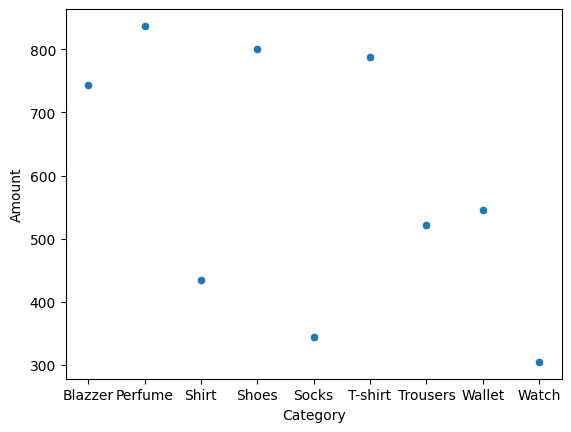

In [22]:
sns.scatterplot(data=category_median)

In [23]:
def fill_amount(row):
    if pd.isnull(row['Amount']):
        return category_median[row['Category']]
    return row['Amount']

In [24]:
data['Amount'] = data.apply(fill_amount, axis=1)

In [25]:
data['currency'].fillna('Unknown', inplace=True)

<ipython-input-25-2ad61bc48a99>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['currency'].fillna('Unknown', inplace=True)


In [26]:
data.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [27]:
data[data['ship-city'].isnull()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
1872,1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,1,INR,493.0,NaN,NaN,NaN,NaN,False
1873,1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,1,INR,458.0,NaN,NaN,NaN,NaN,False
2090,1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,1,INR,493.0,NaN,NaN,NaN,NaN,False
2091,1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,1,INR,458.0,NaN,NaN,NaN,NaN,False
8753,8752,406-4003386-8768363,2022-04-25,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,432.0,NaN,NaN,NaN,NaN,False
11216,11215,402-0107720-7057168,2022-04-23,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,654.0,NaN,NaN,NaN,NaN,False
13253,13252,407-4532637-8415521,2022-04-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,S,On the Way,0,INR,380.0,NaN,NaN,NaN,NaN,False
15689,15688,404-9229894-8608305,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,442.0,NaN,NaN,NaN,NaN,False
16788,16787,402-4919636-4333150,2022-04-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,376.0,NaN,NaN,NaN,NaN,False
18352,18351,405-4927647-8064368,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1112.0,NaN,NaN,NaN,NaN,False


In [28]:
data[:]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False


In [29]:
data['Order ID'].duplicated().sum()

8747

In [30]:
data['index'].duplicated().sum()

168

In [31]:
data[data['index'].duplicated()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
201,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False
202,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,False
203,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,Unknown,788.0,HYDERABAD,TELANGANA,500008.0,IN,False
204,9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,False
205,10,407-5633625-6970741,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,6278,171-5170733-7855514,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,582.0,HYDERABAD,TELANGANA,500083.0,IN,False
6641,6279,403-8137343-5206760,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,801.0,KALPETTA,KERALA,673122.0,IN,False
6642,6280,408-1575454-3263526,2022-04-26,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,690.0,CHENNAI,TAMIL NADU,600049.0,IN,False
6643,6281,171-2918708-7197155,2022-04-26,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,1,INR,658.0,PUNE,MAHARASHTRA,412207.0,IN,False


In [32]:
data[data['index']==6]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False
201,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False


In [33]:
data.drop_duplicates(subset='index', inplace=True)

In [34]:
data[data['index']==6]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False


In [35]:
data['index'].duplicated().sum()

0

In [36]:
location_mapping = df.dropna(subset=['ship-city', 'ship-state', 'ship-country', 'ship-postal-code'])

# Step 2: Try to find a match using other columns (excluding the ones with missing values)
possible_keys = ['Order ID', 'Fulfilment', 'Sales Channel', 'Category']  # Adjust based on dataset
location_dict = location_mapping.set_index(possible_keys)[['ship-city', 'ship-state', 'ship-country', 'ship-postal-code']].reset_index().to_dict(orient='index')

def fill_missing_location(row):
    if pd.isnull(row['ship-city']) and pd.isnull(row['ship-state']) and pd.isnull(row['ship-country']) and pd.isnull(row['ship-postal-code']):
        lookup_key = tuple(row[key] for key in possible_keys)
        lookup = location_dict.get(lookup_key)

        if lookup:
            row['ship-city'] = lookup['ship-city']
            row['ship-state'] = lookup['ship-state']
            row['ship-country'] = lookup['ship-country']
            row['ship-postal-code'] = lookup['ship-postal-code']

    return row

# Apply function to fill missing locations based on similar rows
df = df.apply(fill_missing_location, axis=1)

# Step 3: Fill remaining missing values using mode (most frequent value)
df['ship-city'].fillna(df['ship-city'].mode()[0], inplace=True)
df['ship-state'].fillna(df['ship-state'].mode()[0], inplace=True)
df['ship-country'].fillna(df['ship-country'].mode()[0], inplace=True)
df['ship-postal-code'].fillna(df['ship-postal-code'].mode()[0], inplace=True)

# Save the cleaned dataset

<ipython-input-36-7b2a57a7c0c8>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-city'].fillna(df['ship-city'].mode()[0], inplace=True)
<ipython-input-36-7b2a57a7c0c8>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [37]:
data.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [38]:


# Handle missing location data ('ship-city', 'ship-state', 'ship-country', 'ship-postal-code')
# Create a subset of data with no missing location information
location_mapping = data.dropna(subset=['ship-city', 'ship-state', 'ship-country', 'ship-postal-code'])

# Define keys for matching similar rows
possible_keys = ['Order ID', 'Fulfilment', 'Sales Channel', 'Category']
# Create a dictionary for efficient lookups
location_dict = location_mapping.set_index(possible_keys)[['ship-city', 'ship-state', 'ship-country', 'ship-postal-code']].reset_index().to_dict(orient='index')

def fill_missing_location(row):
    if pd.isnull(row['ship-city']) or pd.isnull(row['ship-state']) or pd.isnull(row['ship-country']) or pd.isnull(row['ship-postal-code']):
        lookup_key = tuple(row[key] for key in possible_keys if key in row and not pd.isnull(row[key])) #check if key exists and is not null
        if lookup_key in location_dict:
            lookup = location_dict[lookup_key]
            if pd.isnull(row['ship-city']):
                row['ship-city'] = lookup['ship-city']
            if pd.isnull(row['ship-state']):
                row['ship-state'] = lookup['ship-state']
            if pd.isnull(row['ship-country']):
                row['ship-country'] = lookup['ship-country']
            if pd.isnull(row['ship-postal-code']):
                row['ship-postal-code'] = lookup['ship-postal-code']
    return row

# Apply function to fill missing locations
data = data.apply(fill_missing_location, axis=1)


# Fill remaining missing location values with the mode
for col in ['ship-city', 'ship-state', 'ship-country', 'ship-postal-code']:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Display the number of missing values in each column
print(data.isnull().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64


<ipython-input-38-e3bfc4ca9cb8>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [39]:
data[data['Order ID'].duplicated()]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
38,38,403-4367956-2849158,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,368.0,NEW DELHI,DELHI,110092.0,IN,False
62,62,404-2262140-4696366,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,295.0,NAGPUR,MAHARASHTRA,440022.0,IN,False
80,80,408-4069830-3819562,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,1,INR,1281.0,Kolkata,WEST BENGAL,700048.0,IN,False
81,81,408-4069830-3819562,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,1,INR,1186.0,Kolkata,WEST BENGAL,700048.0,IN,False
106,106,405-5257740-5301158,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,1,INR,399.0,ROHTAK,HARYANA,124001.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128875,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,854.0,ALLUR,ANDHRA PRADESH,524315.0,IN,False
128909,128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,Unknown,788.0,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False
128931,128930,407-8519205-5064368,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,635.0,VIJAYAWADA,ANDHRA PRADESH,520010.0,IN,False
128943,128942,403-3035549-4142738,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Trousers,XXL,Shipped,1,INR,518.0,BENGALURU,KARNATAKA,560102.0,IN,False


In [40]:
data[data['Order ID']=='404-8878574-4524358']

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
128953,128952,404-8878574-4524358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,301.0,Rishra Hooghly,WEST BENGAL,712249.0,IN,False
128954,128953,404-8878574-4524358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,301.0,Rishra Hooghly,WEST BENGAL,712249.0,IN,False


In [41]:
data.drop_duplicates(subset='Order ID', inplace=True)

In [42]:
data[data['Order ID']=='404-8878574-4524358']

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
128953,128952,404-8878574-4524358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,301.0,Rishra Hooghly,WEST BENGAL,712249.0,IN,False


In [43]:
data['Order ID'].duplicated().sum()

0

In [44]:
data[:]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False


In [45]:
data.duplicated().sum()

0

In [46]:

data.to_excel('cleaned_amazon_sales_report.xlsx', index=False)

**as data is cleaned , now we perform analysis**

In [47]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [48]:

data['Year'].value_counts()

,count
Year,
2022,120227


In [49]:
daily_sales = data.groupby('Date')['Amount'].sum()
monthly_sales = data.groupby(['Year', 'Month'])['Amount'].sum()
yearly_sales = data.groupby('Year')['Amount'].sum()

In [50]:
total_revenue = data['Amount'].sum()
total_orders = data['Order ID'].nunique()  # Unique orders
average_order_value = total_revenue / total_orders

In [51]:
print("🔹 Total Revenue:", total_revenue)
print("🔹 Total Orders:", total_orders)
print("🔹 Average Order Value (AOV):", average_order_value)


🔹 Total Revenue: 77936645.87
🔹 Total Orders: 120227
🔹 Average Order Value (AOV): 648.2457839753134


In [52]:
monthly_sales_df = monthly_sales.reset_index()
best_month = monthly_sales_df.loc[monthly_sales_df['Amount'].idxmax()]
worst_month = monthly_sales_df.loc[monthly_sales_df['Amount'].idxmin()]


In [53]:
print("📈 Best Sales Month:", best_month['Year'], "-", best_month['Month'], "with Revenue:", best_month['Amount'])
print("📉 Worst Sales Month:", worst_month['Year'], "-", worst_month['Month'], "with Revenue:", worst_month['Amount'])

📈 Best Sales Month: 2022.0 - 4.0 with Revenue: 28635832.2
📉 Worst Sales Month: 2022.0 - 3.0 with Revenue: 101922.85


In [54]:
import matplotlib.pyplot as plt


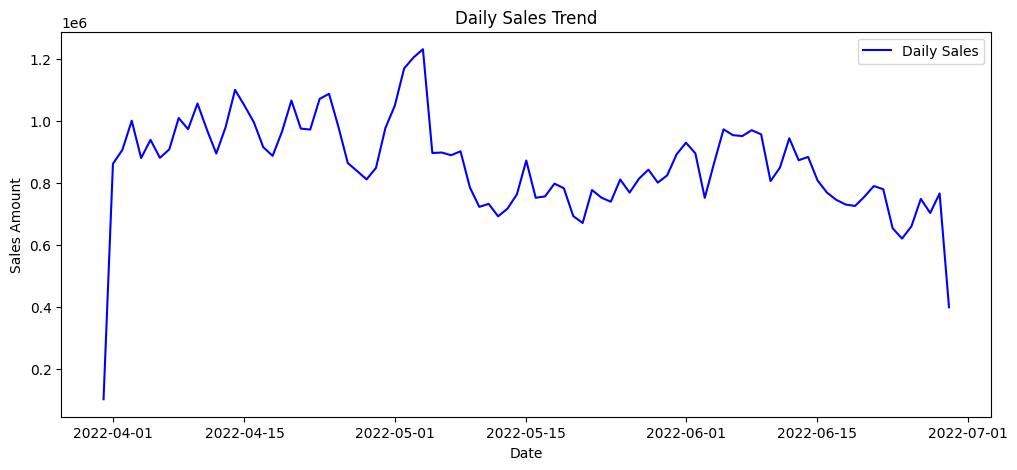

In [55]:
# Daily Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, label="Daily Sales", color='b')
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Daily Sales Trend")
plt.legend()
plt.show()

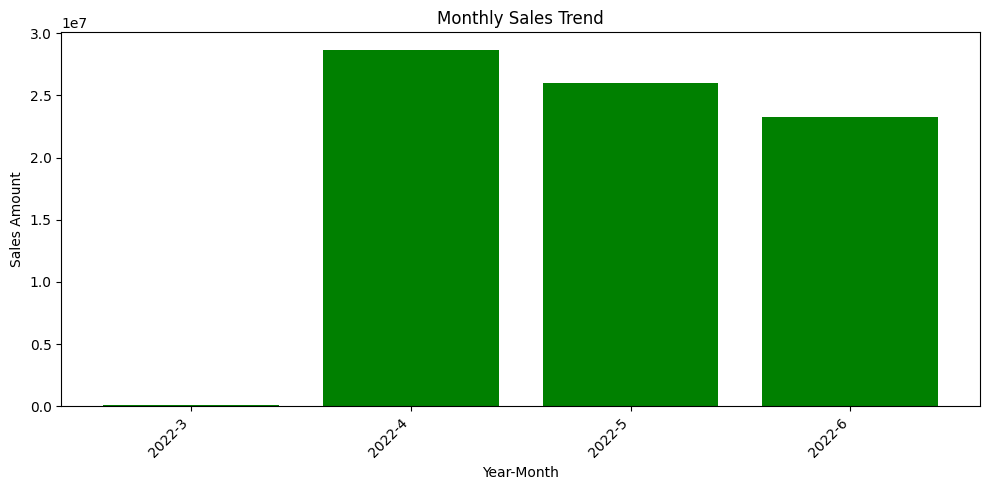

In [56]:
# Monthly Sales Trend
plt.figure(figsize=(10, 5))
# Convert the MultiIndex to a list of strings for plotting
x_labels = [f"{year}-{month}" for year, month in monthly_sales.index]
plt.bar(x_labels, monthly_sales.values, color='g')  # Use the string labels
plt.xlabel("Year-Month")
plt.ylabel("Sales Amount")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

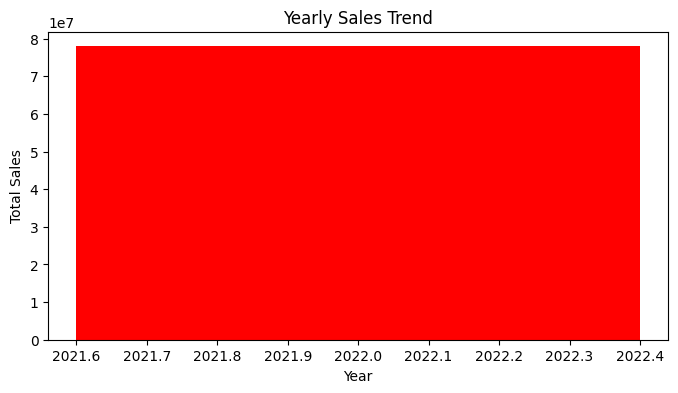

In [57]:
# Yearly Sales Trend
plt.figure(figsize=(8, 4))
plt.bar(yearly_sales.index, yearly_sales.values, color='r')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales Trend")
plt.show()

In [58]:
top_products = data.groupby('Category')['Qty'].sum().sort_values(ascending=False)
top_revenue_products = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

In [59]:
avg_quantity_per_order = data.groupby('Category')['Qty'].mean()

In [60]:
best_selling_category = top_products.idxmax()
least_selling_category = top_products.idxmin()
top_revenue_category = top_revenue_products.idxmax()

In [61]:
print(f"🏆 Best-Selling Category: {best_selling_category} with {top_products.max()} units sold")
print(f"📉 Least-Selling Category: {least_selling_category} with {top_products.min()} units sold")
print(f"💰 Top Revenue-Generating Category: {top_revenue_category} with revenue of {top_revenue_products.max()}")


🏆 Best-Selling Category: T-shirt with 42428 units sold
📉 Least-Selling Category: Watch with 1 units sold
💰 Top Revenue-Generating Category: T-shirt with revenue of 39120580.0


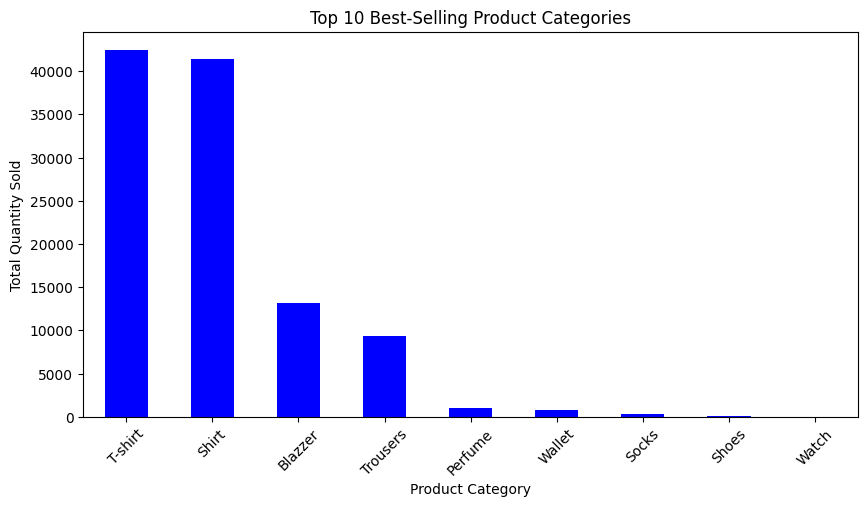

In [62]:
# Top 10 Best-Selling Products
plt.figure(figsize=(10, 5))
top_products.head(10).plot(kind='bar', color='b')
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 Best-Selling Product Categories")
plt.xticks(rotation=45)
plt.show()


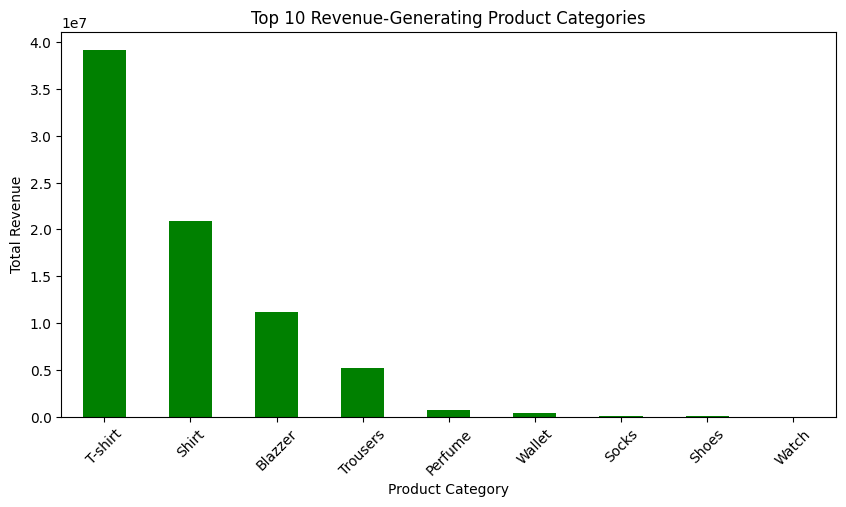

In [63]:
# Top 10 Revenue-Generating Products
plt.figure(figsize=(10, 5))
top_revenue_products.head(10).plot(kind='bar', color='g')
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.title("Top 10 Revenue-Generating Product Categories")
plt.xticks(rotation=45)
plt.show()

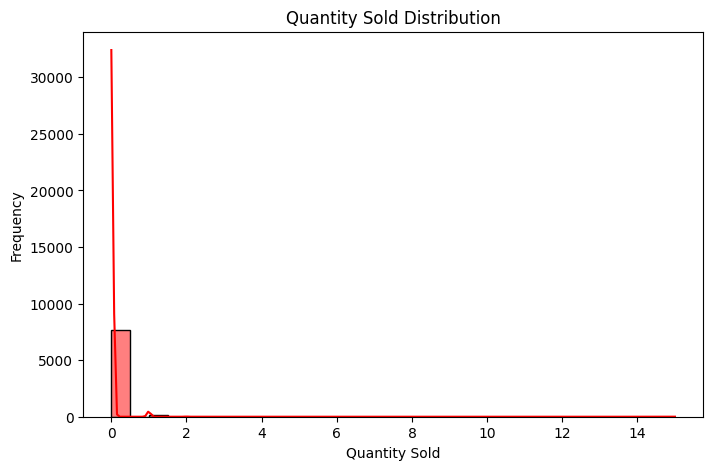

In [64]:
# Quantity Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Qty'], bins=30, kde=True, color='r')
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.title("Quantity Sold Distribution")
plt.show()

In [65]:
fulfillment_counts = data['Fulfilment'].value_counts()

In [66]:
fulfillment_counts

,count
Fulfilment,
Amazon,83904
Merchant,36323


In [67]:
fulfillment_revenue = data.groupby('Fulfilment')['Amount'].sum()

In [68]:
order_status_counts = data.groupby(['Fulfilment', 'Status'])['Order ID'].count().unstack()

In [69]:
canceled_orders = data[data['Status'].str.contains('Cancel', case=False, na=False)]
cancellation_rates = canceled_orders.groupby('Fulfilment')['Order ID'].count() / data.groupby('Fulfilment')['Order ID'].count()

In [70]:
print("✅ Fulfillment Method Distribution:\n", fulfillment_counts)
print("💰 Revenue by Fulfillment Method:\n", fulfillment_revenue)
print("📉 Cancellation Rate by Fulfillment Method:\n", cancellation_rates)


✅ Fulfillment Method Distribution:
 Fulfilment
Amazon      83904
Merchant    36323
Name: count, dtype: int64
💰 Revenue by Fulfillment Method:
 Fulfilment
Amazon      54391606.00
Merchant    23545039.87
Name: Amount, dtype: float64
📉 Cancellation Rate by Fulfillment Method:
 Fulfilment
Amazon      0.128587
Merchant    0.175509
Name: Order ID, dtype: float64


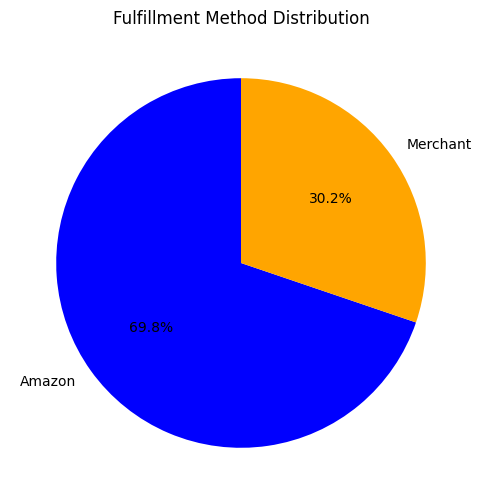

In [71]:
# Pie Chart for Fulfillment Distribution
plt.figure(figsize=(6, 6))
fulfillment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title("Fulfillment Method Distribution")
plt.ylabel("")
plt.show()


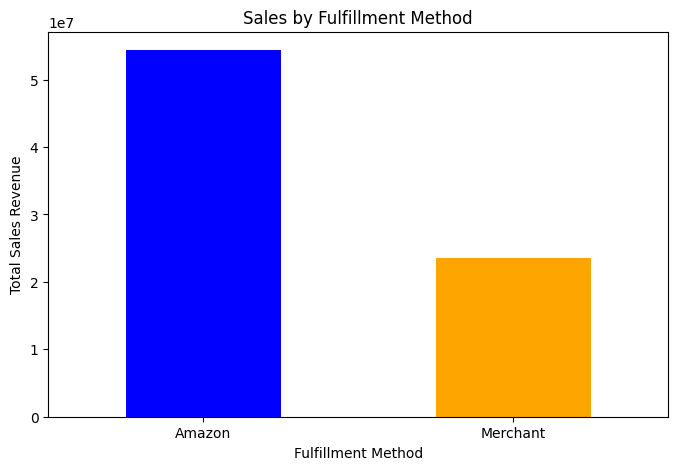

In [72]:
# Bar Chart for Sales by Fulfillment Method
plt.figure(figsize=(8, 5))
fulfillment_revenue.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Fulfillment Method")
plt.ylabel("Total Sales Revenue")
plt.title("Sales by Fulfillment Method")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

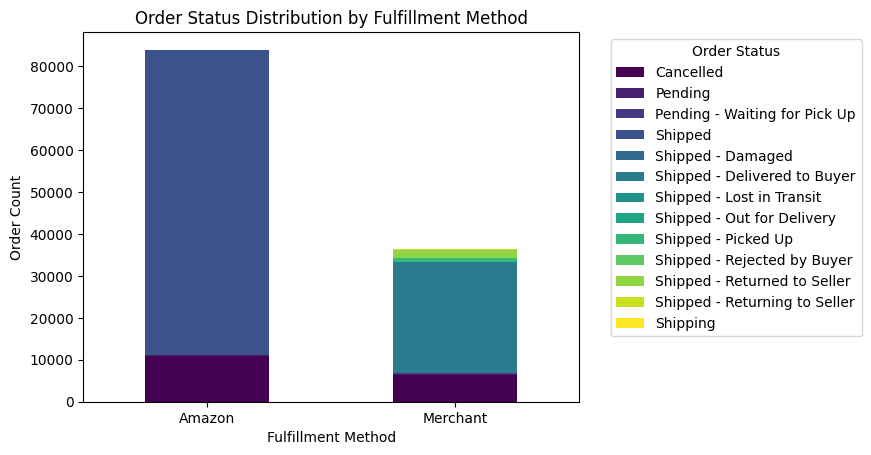

In [73]:
plt.figure(figsize=(10, 6))
order_status_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel("Fulfillment Method")
plt.ylabel("Order Count")
plt.title("Order Status Distribution by Fulfillment Method")
plt.xticks(rotation=0)

# Move legend outside the plot
plt.legend(title="Order Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [74]:
customer_orders = data.groupby('B2B')['Order ID'].nunique()
high_value_customers = data.groupby('B2B')['Amount'].sum().sort_values(ascending=False)

In [75]:
data['Date'] = pd.to_datetime(df['Date'])
latest_date = data['Date'].max()


In [76]:
rfm = data.groupby('B2B').agg({
    'Date': lambda x: (latest_date - x.max()).days,  # Recency (days since last purchase)
    'Order ID': 'nunique',  # Frequency (number of orders)
    'Amount': 'sum'  # Monetary (total spending)
})

In [77]:
rfm.rename(columns={'Date': 'Recency', 'Order ID': 'Frequency', 'Amount': 'Monetary'}, inplace=True)


In [78]:
rfm['Customer Segment'] = 'Low-Value'
rfm.loc[(rfm['Frequency'] > rfm['Frequency'].median()) & (rfm['Monetary'] > rfm['Monetary'].median()), 'Customer Segment'] = 'High-Value'
rfm.loc[(rfm['Frequency'] <= rfm['Frequency'].median()) & (rfm['Monetary'] > rfm['Monetary'].median()), 'Customer Segment'] = 'Mid-Value'

In [79]:
print("✅ Frequent Buyers vs. One-Time Buyers:\n", customer_orders)
print("💰 High-Value Customers:\n", high_value_customers.head(10))
print("📊 RFM Customer Segmentation:\n", rfm.head(10))


✅ Frequent Buyers vs. One-Time Buyers:
 B2B
False    119433
True        794
Name: Order ID, dtype: int64
💰 High-Value Customers:
 B2B
False    77379243.14
True       557402.73
Name: Amount, dtype: float64
📊 RFM Customer Segmentation:
        Recency  Frequency     Monetary Customer Segment
B2B                                                    
False        0     119433  77379243.14       High-Value
True         4        794    557402.73        Low-Value


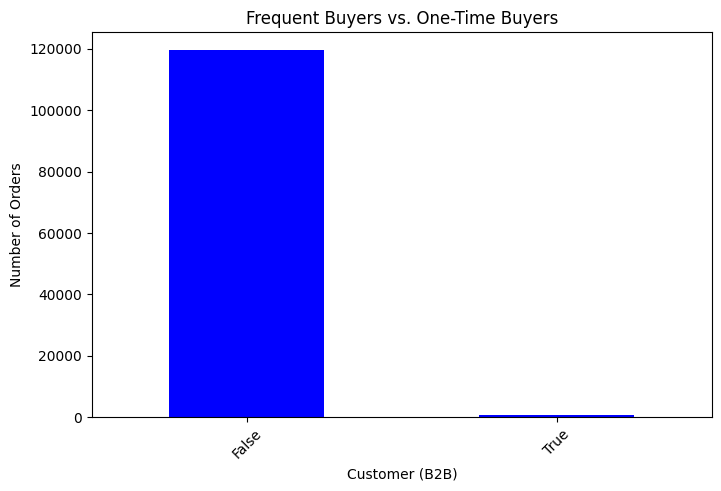

In [80]:
# Bar Chart: Number of Orders per Customer
plt.figure(figsize=(8, 5))
customer_orders.plot(kind='bar', color='blue')
plt.xlabel("Customer (B2B)")
plt.ylabel("Number of Orders")
plt.title("Frequent Buyers vs. One-Time Buyers")
plt.xticks(rotation=45)
plt.show()


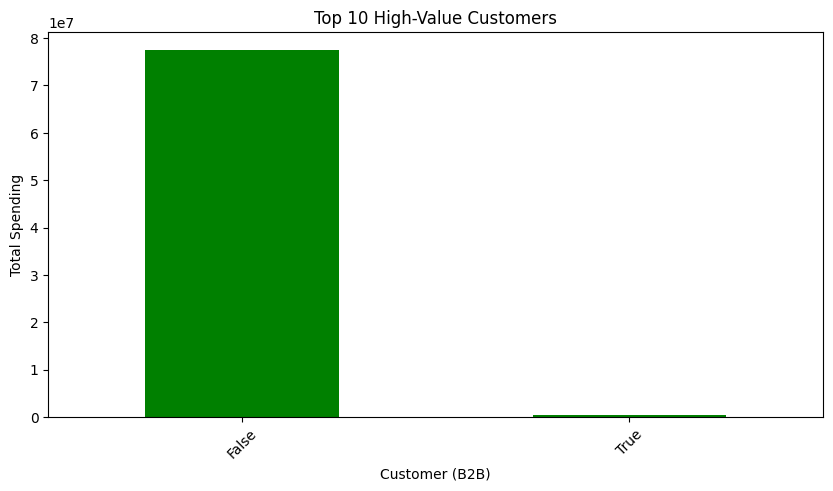

In [81]:
# Bar Chart: High-Value Customers by Spending
plt.figure(figsize=(10, 5))
high_value_customers.head(10).plot(kind='bar', color='green')
plt.xlabel("Customer (B2B)")
plt.ylabel("Total Spending")
plt.title("Top 10 High-Value Customers")
plt.xticks(rotation=45)
plt.show()

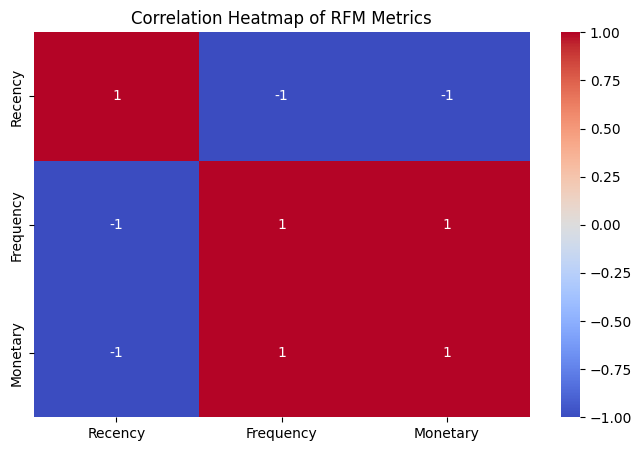

In [82]:
# Heatmap: RFM Analysis
plt.figure(figsize=(8, 5))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of RFM Metrics")
plt.show()

In [83]:
state_sales = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
country_sales = data.groupby('ship-country')['Amount'].sum().sort_values(ascending=False)

In [84]:
top_state = state_sales.idxmax()
top_country = country_sales.idxmax()
low_state = state_sales.idxmin()
low_country = country_sales.idxmin()


In [85]:
print(f"🏆 Top-Performing State: {top_state} with Revenue: {state_sales.max()}")
print(f"📉 Lowest-Performing State: {low_state} with Revenue: {state_sales.min()}")
print(f"🌍 Top-Performing Country: {top_country} with Revenue: {country_sales.max()}")
print(f"📉 Lowest-Performing Country: {low_country} with Revenue: {country_sales.min()}")


🏆 Top-Performing State: MAHARASHTRA with Revenue: 13146393.52
📉 Lowest-Performing State: PB with Revenue: 399.0
🌍 Top-Performing Country: IN with Revenue: 77936645.87
📉 Lowest-Performing Country: IN with Revenue: 77936645.87


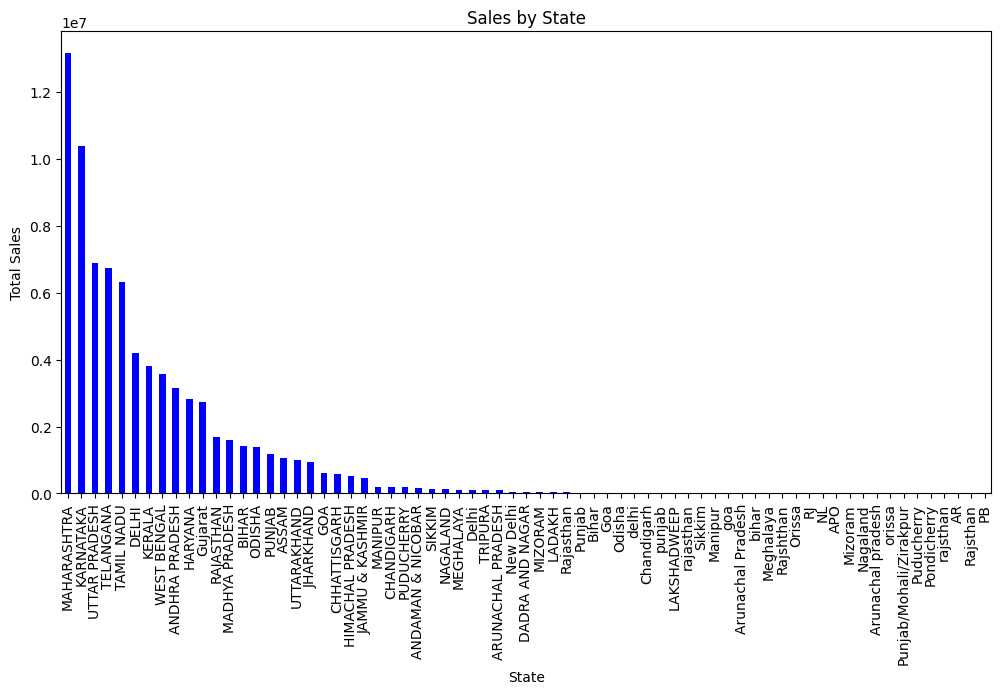

In [86]:
# Bar Chart: Sales by State
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color='blue')
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Sales by State")
plt.xticks(rotation=90)
plt.show()

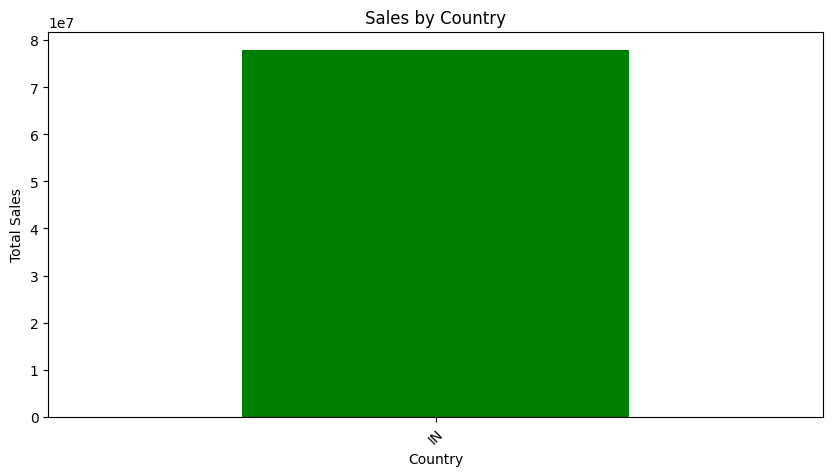

In [87]:
# Bar Chart: Sales by Country
plt.figure(figsize=(10, 5))
country_sales.plot(kind='bar', color='green')
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.title("Sales by Country")
plt.xticks(rotation=45)
plt.show()

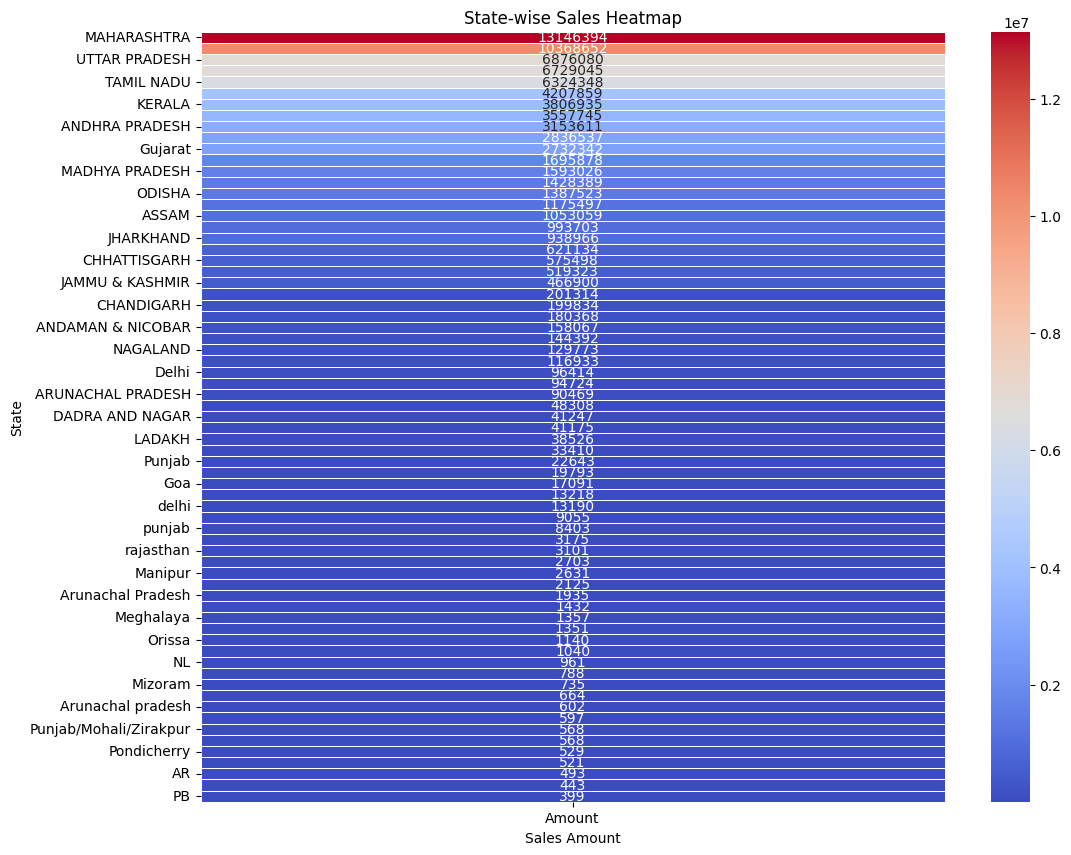

In [89]:
# Heatmap: Sales Distribution
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(state_sales), annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("State-wise Sales Heatmap")
plt.ylabel("State")
plt.xlabel("Sales Amount")
plt.show()

In [90]:
# import plotly.express as px

# # Reset the index to make 'ship-state' a column
# state_sales = state_sales.reset_index()

# # Assuming 'ship-state' contains state names or abbreviations
# fig = px.choropleth(
#     state_sales,
#     locations="ship-state",
#     locationmode="country names",  # Changed to 'country names'
#     color="Amount",
#     hover_name="ship-state",
#     color_continuous_scale="blues",
#     title="Sales by State"
# )


# # Adjust scope for a more focused view (e.g., 'asia') if necessary
# # If the 'ship-state' column contains country names, this part is relevant
# # fig.update_geos(visible=False, resolution=50, scope="asia", showcountries=True, countrycolor="Black", showsubunits=True, subunitcolor="Blue")
# # fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'))

# fig.show()